In [1]:
import numpy as np
import pandas as pd

### 0. 주어진 데이터를 불어온 후 상위 10개 행을 출력해 주세요.

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
cd /content/gdrive/My Drive/BOAZ

/content/gdrive/My Drive/BOAZ


In [4]:
df=pd.read_csv("train.csv")
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
5,5,20150403T000000,662500.0,3,2.50,3560,9796,1.0,0,0,3,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
6,6,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
7,7,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
8,8,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208
9,9,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,3,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850


### 1. 각 Column별로 null값이 있는지 확인해주세요.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

### 2. grade Column에는 어떤 값이 있는지 확인해주세요.

In [6]:
df.grade.unique()

array([ 7,  6,  8,  9, 10, 11, 12,  5,  4,  3, 13,  1])

### 3. zipcode에 대해서 문자열로 바꿔주세요.

In [7]:
df['zipcode']=df['zipcode'].astype(str)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  object 
 17  lat            15035 non-null  float64
 18  long  

### 4. loc를 활용하여 date, price, grade만 출력해주세요.

In [9]:
df.loc[:,['date','price','grade']]

,date,price,grade
0,20141013T000000,221900.0,7
1,20150225T000000,180000.0,6
2,20150218T000000,510000.0,8
3,20140627T000000,257500.0,7
4,20150115T000000,291850.0,7
...,...,...,...
15030,20141014T000000,610685.0,9
15031,20150326T000000,1007500.0,9
15032,20140521T000000,360000.0,8
15033,20150223T000000,400000.0,8


### 5. grade가 13인 행들만 보여주세요.

In [10]:
df.loc[df.grade==13 ]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3134,3134,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
3867,3867,20141010T000000,1780000.0,4,3.25,4890,13402,2.0,0,0,3,13,4890,0,2004,0,98059,47.5303,-122.131,5790,13539
4266,4266,20141120T000000,2385000.0,4,4.00,6330,13296,2.0,0,2,3,13,4900,1430,2000,0,98033,47.6488,-122.201,2200,9196
4957,4957,20140701T000000,3800000.0,5,5.50,7050,42840,1.0,0,2,4,13,4320,2730,1978,0,98004,47.6229,-122.220,5070,20570
5108,5108,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
5560,5560,20140923T000000,3200000.0,6,5.00,7100,18200,2.5,0,0,3,13,5240,1860,1933,2002,98199,47.6427,-122.408,3130,6477
6469,6469,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
7246,7246,20141212T000000,2983000.0,5,5.50,7400,18898,2.0,0,3,3,13,6290,1110,2001,0,98006,47.5431,-122.112,6110,26442
10152,10152,20140611T000000,2888000.0,5,6.25,8670,64033,2.0,0,4,3,13,6120,2550,1965,2003,98177,47.7295,-122.372,4140,81021


### 6. grade별로 평균 가격을 보여주세요.

In [11]:
df2=df.groupby('grade')['price'].agg([('grade_mean','mean')])
df2

,grade_mean
grade,
1,1.420000e+05
3,2.710000e+05
4,2.097413e+05
5,2.510696e+05
6,3.001554e+05
7,4.015281e+05
8,5.423156e+05
9,7.734781e+05
10,1.062482e+06


### 7. 6번에서 만든 데이터를 원본 데이터와 merge해주세요.

In [12]:
pd.merge(df,df2,on="grade",how="outer")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_mean
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,4.015281e+05
1,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,4.015281e+05
2,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,4.015281e+05
3,6,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000,4.015281e+05
4,7,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697,4.015281e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15030,5560,20140923T000000,3200000.0,6,5.00,7100,18200,2.5,0,0,3,13,5240,1860,1933,2002,98199,47.6427,-122.408,3130,6477,4.132333e+06
15031,6469,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730,4.132333e+06
15032,7246,20141212T000000,2983000.0,5,5.50,7400,18898,2.0,0,3,3,13,6290,1110,2001,0,98006,47.5431,-122.112,6110,26442,4.132333e+06
15033,10152,20140611T000000,2888000.0,5,6.25,8670,64033,2.0,0,4,3,13,6120,2550,1965,2003,98177,47.7295,-122.372,4140,81021,4.132333e+06


### 8. Date Column을 이용해 년, 월, 일에 해당하는 3개의 새로운 Column을 만들어주세요.

In [13]:
df['new_date']=pd.to_datetime(df['date'])

df['year']=df['new_date'].dt.year
df['month']=df['new_date'].dt.month
df['day']=df['new_date'].dt.day

df.drop(['new_date'], axis='columns').head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,2014,6,27
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,2015,1,15


### 9. 이후 Price를 예측하는 모델을 제작하기 위해 추가적인 변수를 만드려고 합니다. Price의 데이터 분포를 확인하고 1개 이상의 EDA를 통해 의견을 제시해주세요.

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)
plt.rcParams["figure.figsize"] = (14,7)
plt.rcParams['lines.linewidth'] = 3.0
plt.rcParams['axes.grid'] = True 
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=20)

findfont: Font family ['malgun gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['malgun gothic'] not found. Falling back to DejaVu Sans.


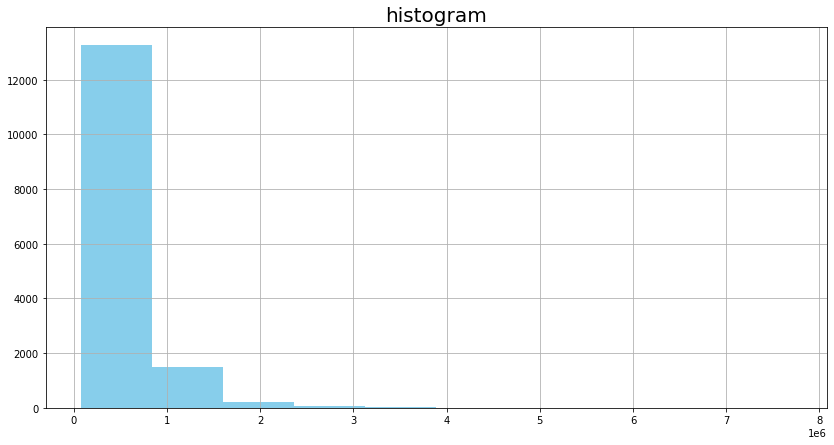

In [15]:
#price 데이터 분포
plt.hist(df['price'],color='skyblue')
plt.title("histogram")
plt.show()

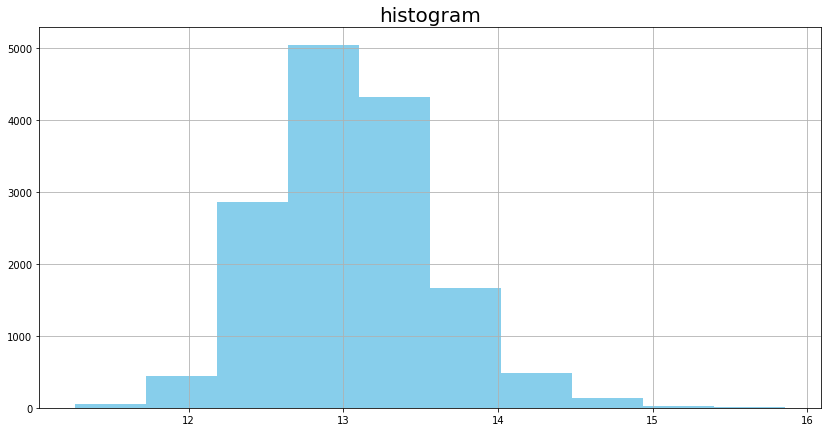

In [16]:
#왼쪽으로 치우쳐있어서 log이용
new_price=np.log(df.price)
plt.hist(new_price,color='skyblue')
plt.title("histogram")
plt.show()

In [17]:
#price와의 상관관계를 피어슨 상관계수를 이용해 표현

corr= df.corr(method='pearson').loc['price']
corr

id               0.020899
price            1.000000
bedrooms         0.323672
bathrooms        0.525479
sqft_living      0.702899
sqft_lot         0.096793
floors           0.262588
waterfront       0.265738
view             0.400806
condition        0.039740
grade            0.667211
sqft_above       0.608577
sqft_basement    0.322218
yr_built         0.047290
yr_renovated     0.140808
lat              0.301604
long             0.023547
sqft_living15    0.586419
sqft_lot15       0.086384
year             0.008012
month           -0.010352
day             -0.013625
Name: price, dtype: float64

findfont: Font family ['malgun gothic'] not found. Falling back to DejaVu Sans.


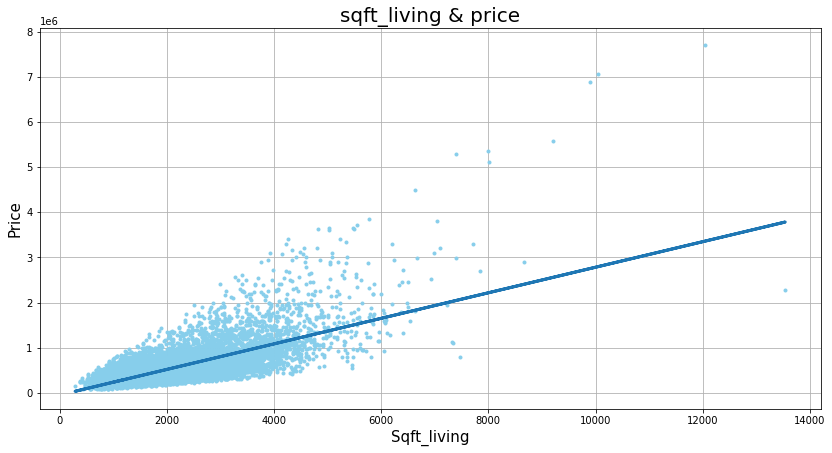

In [18]:
# 위의 결과에서 가장 높은 상관관계를 보이는 sqft_living과 price의 그래프

plt.plot(df.sqft_living,df.price,linestyle='none',marker='o',markersize=3,color='skyblue')
plt.xlabel('Sqft_living')
plt.ylabel('Price')
plt.title("sqft_living & price")

m,b = np.polyfit(df.sqft_living,df.price,1)
plt.plot(df.sqft_living,m*df.sqft_living+b)
plt.show()

###예상대로 유의미한 결과를 보이는 것을 확인할 수 있다

##-> 집 가격을 예측하기 위한 새로운 변수 생성

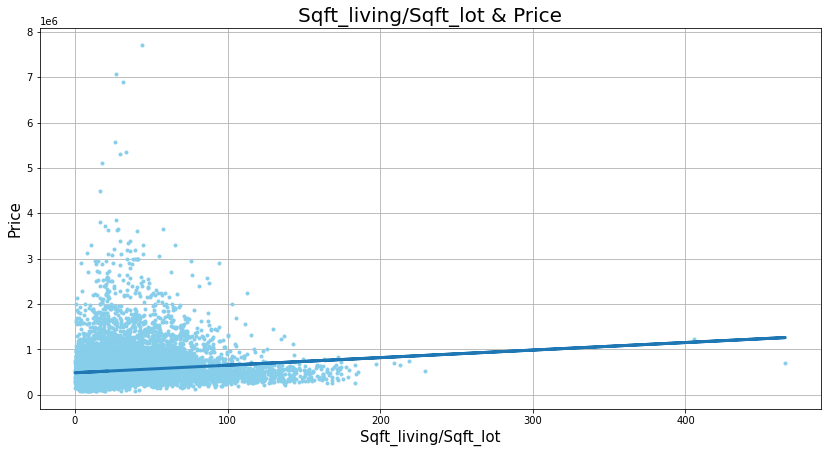

In [19]:
#sqft_living과 sqft_lot의 비율과 price의 상관관계
x=(df.sqft_living/df.sqft_lot)*100
plt.plot(x,df.price,linestyle='none',marker='o',markersize=3,color='skyblue')
plt.xlabel('Sqft_living/Sqft_lot')
plt.ylabel('Price')
plt.title("Sqft_living/Sqft_lot & Price")

m,b = np.polyfit(x,df.price,1)
plt.plot(x,m*x+b)
plt.show()

###별로 유의미 하지 않은 결과

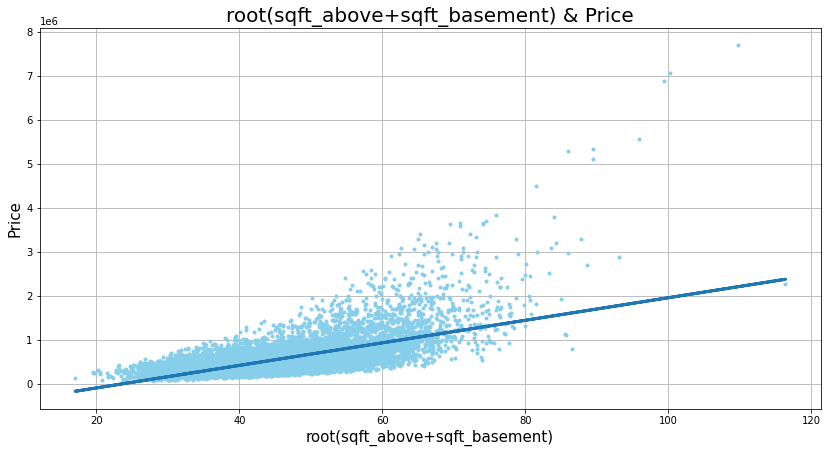

In [22]:
#sqft_above와 sqft_Basement의 합에 루트씌운 값과 price의 상관관계
x2=(df.sqft_above+df.sqft_basement)**0.5
plt.plot(x2,df.price,linestyle='none',marker='o',markersize=3,color='skyblue')
plt.xlabel('root(sqft_above+sqft_basement)')
plt.ylabel('Price')
plt.title("root(sqft_above+sqft_basement) & Price")

m,b = np.polyfit(x2,df.price,1)
plt.plot(x2,m*x2+b)
plt.show()

###sqft_above와 sqft_Basement의 합에 루트를 씌운 값과 price의 상관관계가 크게 유의미한 선형관계를 띈다는 것을 확인할 수 있다

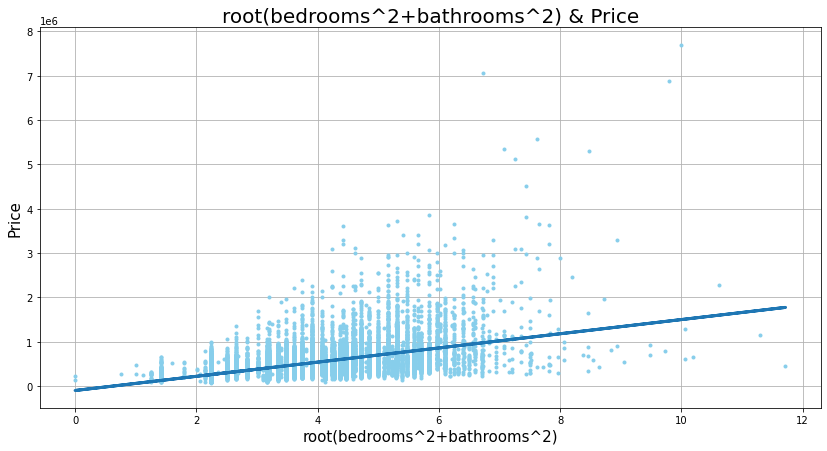

In [23]:
x3=(df.bedrooms**2 + df.bathrooms**2)**0.5
plt.plot(x3,df.price,linestyle='none',marker='o',markersize=3,color='skyblue')
plt.xlabel('root(bedrooms^2+bathrooms^2)')
plt.ylabel('Price')
plt.title("root(bedrooms^2+bathrooms^2) & Price")

m,b = np.polyfit(x3,df.price,1)
plt.plot(x3,m*x3+b)
plt.show()

### 꽤 유의미한 선형결과를 얻은것으로 보인다